This notebook explores text classification, introducing a majority class baseline and analyzing the affect of hyperparameter choices on accuracy.

In [15]:
import sys
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn import linear_model
import pandas as pd
import numpy as np
import re
import nltk

In [2]:
def read_data(filename):
    X=[]
    Y=[]
    with open(filename, encoding="utf-8") as file:
        for line in file:
            cols=line.rstrip().split("\t")
            label=cols[0]
            text=cols[1]
            # sample text data is already tokenized; if yours is not, do so here            
            X.append(text)
            Y.append(label)
    return X, Y

In [3]:
# Change this to the directory with your data (from the CheckData_TODO.ipynb exercise).  
# The directory should contain train.tsv, dev.tsv and test.tsv
directory="../data/text_classification"

In [4]:
trainX, trainY=read_data("%s/train.tsv" % directory)
devX, devY=read_data("%s/dev.tsv" % directory)

In [5]:
def majority_class(trainY, devY):
    # your code here
    
    classes = pd.Series(trainY).value_counts().index
    major_class =  pd.Series(trainY).value_counts().index[0] if (pd.Series(trainY).value_counts())[0] > (pd.Series(trainY).value_counts())[1] else trainY.value_counts().index[1] 
    
    ## calculate accuracy
    pred_table = pd.DataFrame({"pred": major_class,
                               "label": devY})
    pred_table['correct']= pred_table.pred == pred_table.label
    
    num_correct = pred_table.correct.value_counts()[True]
    accuracy = num_correct/pred_table.shape[0]
    return accuracy

Baselines are critical as a point of reference to understand how well a text classification method is performing.  One of the simplest of these is the *majority class* baseline: for every point in the test data, predict the label that shows up most frequently **in the training data**.  Implement that basline for your data.

In [6]:
majority_class(trainY,devY)

0.484

Scikit-learn's [GridSearchCV](https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html) is a convenient function for evaluating performance across a range of parameters.  For more control, let's write our own grid search function here.  Explore the performance for different parameter settings of [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) (e.g., binary, stopword removal, lowercasing, etc.)

In [17]:
def preprocess(text):
    text = text.replace("_NEWLINE_", " ")
    text = text.replace("_TAB_", " ")
    text = re.sub(r"(?:https?:\S+)", "", text)
    text = " ".join(nltk.word_tokenize(text))
    return text

In [20]:
trainX = list(map(preprocess, trainX))
devX = list(map(preprocess, devX))

In [21]:
scores=[]
names=[]

feat_vals=[50, 100, 500, 1000, 5000, 10000, 50000]

le = preprocessing.LabelEncoder()
le.fit(trainY)
Y_train=le.transform(trainY)
Y_dev=le.transform(devY)

idx=0

for feat_val in feat_vals:

    # split the string on whitespace because we assume it has already been tokenized
    vectorizer = CountVectorizer(max_features=feat_val, analyzer=str.split, lowercase=False, strip_accents=None, binary=True)

    X_train = vectorizer.fit_transform(trainX)
    X_dev = vectorizer.transform(devX)

    print ("%s of %s trials" % (idx, len(feat_vals)))

    logreg = linear_model.LogisticRegression(C=1.0, solver='lbfgs', penalty='l2')
    logreg.fit(X_train, Y_train)
    scores.append(logreg.score(X_dev, Y_dev))
    names.append("feat_value:%s" % (feat_val))
    idx+=1

0 of 7 trials
1 of 7 trials
2 of 7 trials
3 of 7 trials
4 of 7 trials
5 of 7 trials
6 of 7 trials


In [22]:
# Let's plot these results (may need to execute twice to diplay graph)
pd_results=pd.DataFrame({"value":names, "accuracy":scores})
pd_results.plot.bar(x='value', y='accuracy', figsize=(14,6))
pd_results

,value,accuracy
0,feat_value:50,0.576
1,feat_value:100,0.576
2,feat_value:500,0.572
3,feat_value:1000,0.580
4,feat_value:5000,0.612
5,feat_value:10000,0.608
6,feat_value:50000,0.608


Some parameters interact with each other (like the number of features and the regularization strength). Perform grid search on a combination of features to evaluate how their interaction affects accuracy.

In [23]:
scores=[]
names=[]

feat_vals=[50, 100, 500, 1000, 5000, 10000, 50000]
C_values=[0.001, 0.1, 1, 5, 10]

le = preprocessing.LabelEncoder()
le.fit(trainY)
Y_train=le.transform(trainY)
Y_dev=le.transform(devY)

idx=0

for feat_val in feat_vals:

    # split the string on whitespace because we assume it has already been tokenized
    vectorizer = CountVectorizer(max_features=feat_val, analyzer=str.split, lowercase=False, strip_accents=None, binary=True)

    X_train = vectorizer.fit_transform(trainX)
    X_dev = vectorizer.transform(devX)

    for C_val in C_values:
        
        print ("%s of %s trials" % (idx, len(feat_vals)*len(C_values)))

        logreg = linear_model.LogisticRegression(C=C_val, solver='lbfgs', penalty='l2')
        logreg.fit(X_train, Y_train)
        scores.append(logreg.score(X_dev, Y_dev))
        names.append("feat_value:%s-C:%s" % (feat_val, C_val))
        idx+=1

0 of 35 trials
1 of 35 trials
2 of 35 trials
3 of 35 trials
4 of 35 trials
5 of 35 trials
6 of 35 trials
7 of 35 trials
8 of 35 trials
9 of 35 trials
10 of 35 trials
11 of 35 trials
12 of 35 trials
13 of 35 trials
14 of 35 trials
15 of 35 trials
16 of 35 trials
17 of 35 trials
18 of 35 trials
19 of 35 trials
20 of 35 trials
21 of 35 trials
22 of 35 trials
23 of 35 trials
24 of 35 trials
25 of 35 trials
26 of 35 trials
27 of 35 trials
28 of 35 trials
29 of 35 trials
30 of 35 trials
31 of 35 trials
32 of 35 trials
33 of 35 trials
34 of 35 trials


,value,accuracy
0,feat_value:50-C:0.001,0.544
1,feat_value:50-C:0.1,0.576
2,feat_value:50-C:1,0.576
3,feat_value:50-C:5,0.576
4,feat_value:50-C:10,0.574
5,feat_value:100-C:0.001,0.540
6,feat_value:100-C:0.1,0.570
7,feat_value:100-C:1,0.576
8,feat_value:100-C:5,0.574
9,feat_value:100-C:10,0.574


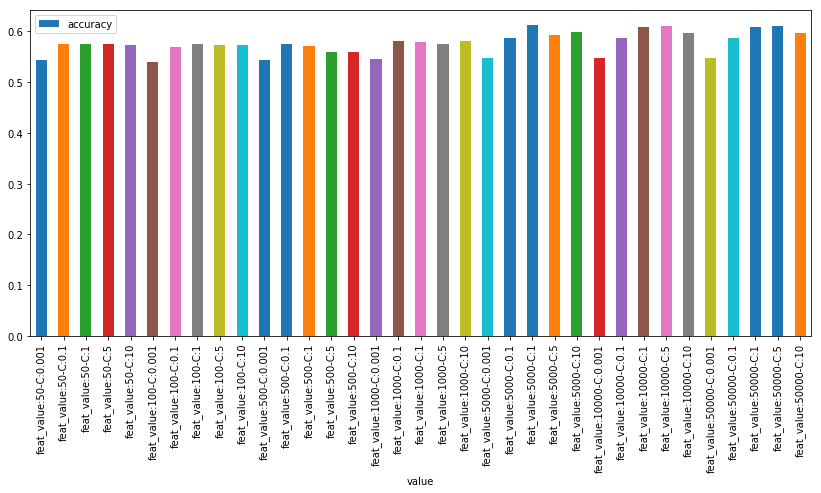

In [24]:
pd_results=pd.DataFrame({"value":names, "accuracy":scores})
pd_results.plot.bar(x='value', y='accuracy', figsize=(14,6))
pd_results